##Performance Measurement

a. In simulation, all of the forces that act on the physical system are added, which provide us with a clear picture on how the mechanism should behave in real life. Ultimately, the most important performance metrics are the ability of the robot to traverse its vertical environment. It is essentially a yes/no metric determined by whether or not the robot can support itself as it moves. Another metric as to the success of our robot's design will be evaluated based on the speed at which it can traverse the sample vertical environment compared to the organisms speed in relation to its overall size. Finding the velocity both in simulation and experiment is a basic calculation of distance over time. Another success criteria is that of the mass the robot is able to support while still successfully climbing vertically through its environment, which, in simulation, would be tested by changing the masses of the burdened links to the desired value. In physical experiments, the robot can have the desired masses strapped to its being.

b. For the successful completion of our robot, the experimental vs simulation metrics should be very different. Since the simulation is telling us how the physical robot should be acting when performing experiments, they should be fairly similar if not identical to one another. 

c. There are two performance metrics we have defined as being important: velocity and mass. The more important metric is that of the maximum supportable mass. In the real world, the benefits of a robot like the one we designed is to get into spaces that may otherwise not be able to be traversed as easily. Generally speaking the speed at which the robot traverses its environment can range, but there will be a minimum mass that the robot will have to carry. For example, in our design we do not have plans of attaching any additional cameras or sensors that other users may require for their applications.

d. A razor clam is able to have a force of about 10N [1], which translates to 2.24 pounds of force. Considering that the average razor clam weighs 0.1 pounds[2], it can be inferred that a razor clam is able to have a total force that is 22.4 times its mass. Given the mass and friction values of our system, the ideal values would be 22.4 times the mass. This includes all forces that are being exerted on the environment of the system. The average razor clam is approximately 0.18m with a velocity of clam is 0.01m/s [3], which gives it a movement of 5% of its body length (1/18) per second. To be as efficient as the clam, the robot, which is currently 0.105m should be able to move 0.005 m/s, as 5% (0.05) of 0.105 is 0.005 (.105*0.05).  

e. (See Code)

##Constraints

a. Some of the constraints that we are bounded by include:

i. The absolute minimum width of the robot is the same as the width of the motor
ii. The robot cannot extend outside of the environment it has been put into, thus the top and bottom links must be smaller than the environment width.

b. Violation of design constraints will result in an explicit bound of the parameter space. 

i. The initial simulation values that were provided to the system resulted in values similar to that of the clam itself. As a result, it has been hard coded to use the size dimensions given. 

ii. The simulation has been shown to follow the same ratios that the clam has found to be optimal in its movement, so explicit bounds have been put in place

##Code (See Below)


##References
[1] S. Huang and J. Tao, “Modeling of the Burrowing Mechanism by Razor Clam: Role of Penetration Kinematics,” 2018, doi: 10.1061/9780784481585.053.

[2] A. Grygus, "Razor Clams," Clovegarden, 2018. [Online]. Available: http://www.clovegarden.com/ingred/sf_bvrazorz.html#:~:text=They%20typically%20weighed%201.63%20ounces,or%20%2414.08%20per%20edible%20pound. [Accessed April 2021]

[3] A. G. Winter and A. E. Hosoi, “Identification and evaluation of the atlantic razor clam (Ensis  directus) for biologically inspired subsea burrowing systems,” in Integrative and Comparative Biology, 2011, vol. 51, no. 1, doi: 10.1093/icb/icr038.


In [ ]:
!pip install pypoly2tri idealab_tools foldable_robotics pynamics

![](https://drive.google.com/uc?export=view&id=1foPDHUCwtVs67u7JXOfD_Rw_clGtRGRN)

2021-04-12 06:48:52,087 - pynamics.system - INFO - getting dynamic equations
2021-04-12 06:48:52,699 - pynamics.system - INFO - solving a = f/m and creating function
2021-04-12 06:48:52,708 - pynamics.system - INFO - substituting constrained in Ma-f.
2021-04-12 06:48:53,076 - pynamics.system - INFO - done solving a = f/m and creating function
2021-04-12 06:48:53,077 - pynamics.system - INFO - calculating function for lambdas
2021-04-12 06:48:53,080 - pynamics.integration - INFO - beginning integration
2021-04-12 06:48:53,083 - pynamics.system - INFO - integration at time 0000.00
2021-04-12 06:48:53,717 - pynamics.system - INFO - integration at time 0001.05
2021-04-12 06:48:54,355 - pynamics.system - INFO - integration at time 0006.11
2021-04-12 06:48:54,508 - pynamics.integration - INFO - finished integration
2021-04-12 06:48:54,537 - pynamics.output - INFO - calculating outputs
2021-04-12 06:48:54,556 - pynamics.output - INFO - done calculating outputs


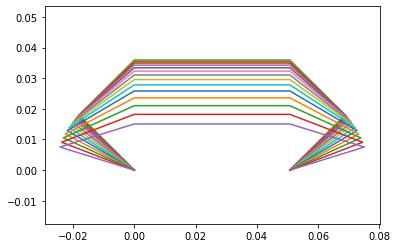

In [ ]:
#Importing Libraries for the code
from pynamics.frame import Frame
from pynamics.variable_types import Differentiable,Constant
from pynamics.system import System
from pynamics.body import Body
from pynamics.dyadic import Dyadic
from pynamics.output import Output,PointsOutput
from pynamics.particle import Particle
import pynamics.integration
import numpy
import matplotlib.pyplot as plt
plt.ion()
from math import pi
from scipy.misc import derivative
import scipy.optimize

#Creating a system
system = System()
pynamics.set_system(__name__,system)

#Length of links are set as constants
l0 = Constant(0.0254,'l0',system) #defines the lengths (in meters) of each frame (1:1 ratio of paper model)
l1 = Constant(0.0254,'l1',system) #1in ~ 0.0254m
l2 = Constant(0.0508,'l2',system)
l3 = Constant(0.0254,'l3',system)
l4 = Constant(0.0254,'l4',system)
l5 = Constant(0.0508,'l5',system)

#Mass of links
mA = Constant(0.01,'mA',system) #defines the mass (in kg) of each frame 
mB = Constant(0.01,'mB',system) #1g ~ 0.001kg
mC = Constant(0.1,'mC',system)
mD = Constant(0.01,'mD',system)
mE = Constant(0.01,'mE',system)
mF = Constant(0.01,'mF',system)

g = Constant(9.81,'g',system) #defines gravity (in m/s^2)
b = Constant(1e-2,'b',system)  #defines damping coefficient (in kg/s^2)
k = Constant(0e1,'k',system)  #defines spring coefficient (kg/s^2)

preload0 = Constant(0*pi/180,'preload0',system) #defines the spring preload to establish neutral point of frame (radians)
preload1 = Constant(0*pi/180,'preload1',system)
preload2 = Constant(0*pi/180,'preload2',system)
preload3 = Constant(0*pi/180,'preload3',system) 
preload4 = Constant(0*pi/180,'preload4',system)
preload5 = Constant(0*pi/180,'preload5',system)

Ixx_A = Constant(1,'Ixx_A',system) #defines the inertia (kg*m^2) of each frame 
Iyy_A = Constant(1,'Iyy_A',system)
Izz_A = Constant(1,'Izz_A',system)
Ixx_B = Constant(1,'Ixx_B',system)
Iyy_B = Constant(1,'Iyy_B',system)
Izz_B = Constant(1,'Izz_B',system)
Ixx_C = Constant(1,'Ixx_C',system)
Iyy_C = Constant(1,'Iyy_C',system)
Izz_C = Constant(1,'Izz_C',system)
Ixx_D = Constant(1,'Ixx_D',system)  
Iyy_D = Constant(1,'Iyy_D',system)
Izz_D = Constant(1,'Izz_D',system)
Ixx_E = Constant(1,'Ixx_E',system)
Iyy_E = Constant(1,'Iyy_E',system)
Izz_E = Constant(1,'Izz_E',system)
Ixx_F = Constant(1,'Ixx_F',system)
Iyy_F = Constant(1,'Iyy_F',system)
Izz_F = Constant(1,'Izz_F',system)

#Initializing time frames
tol = 1e-12

#Creating time frames
tinitial = 0
tfinal = 10
fps = 30
tstep = 1/fps
t = numpy.r_[tinitial:tfinal:tstep]

#Creating differentiable variables
q0,q0_d,q0_dd = Differentiable('q0',system) #angle between N and A frames
q1,q1_d,q1_dd = Differentiable('q1',system) #angle between A and B frames
q2,q2_d,q2_dd = Differentiable('q2',system) #angle between B and C frames
q3,q3_d,q3_dd = Differentiable('q3',system) #angle between C and D frames
q4,q4_d,q4_dd = Differentiable('q4',system) #angle between D and E frames
q5,q5_d,q5_dd = Differentiable('q5',system) #angle between E and F frames

#Initial values
initialvalues = {}
initialvalues[q0] = 135*pi/180  #optimal angle is 135
initialvalues[q0_d] = 0*pi/180
initialvalues[q1] = -90*pi/180  #optimal angle is -90
initialvalues[q1_d] = 0*pi/180
initialvalues[q2] = -45*pi/180  #optimal angle is -45
initialvalues[q2_d] = 0*pi/180
initialvalues[q3] = 45*pi/180   #optimal angle is 45
initialvalues[q3_d] = 0*pi/180
initialvalues[q4] = 90*pi/180   #optimal angle is 90
initialvalues[q4_d] = 0*pi/180
initialvalues[q5] = 45*pi/180   #optimal angle is 45
initialvalues[q5_d] = 0*pi/180

statevariables = system.get_state_variables()
ini = [initialvalues[item] for item in statevariables]

#Creating Frames
N = Frame('N')
A = Frame('A')
B = Frame('B')
C = Frame('C')
D = Frame('D')
E = Frame('E')
F = Frame('F')

#Frames are rotated based off the previous frame with N being the Newtonian(reference) frame
system.set_newtonian(N)


A.rotate_fixed_axis_directed(N,[0,0,1],q0,system)  
B.rotate_fixed_axis_directed(A,[0,0,1],q1,system)  
C.rotate_fixed_axis_directed(B,[0,0,1],q2,system)   
F.rotate_fixed_axis_directed(N,[0,0,1],q5,system)
E.rotate_fixed_axis_directed(F,[0,0,1],q4,system) 
D.rotate_fixed_axis_directed(E,[0,0,1],q3,system) 

#Defining the orientation of the links that make up the sarrus link
pNA = 0*N.x + 0*N.y   
pAB = pNA + l0*A.x    
pBC = pAB + l1*B.x    
pNF = l5*N.x + 0*N.y  
pFE = pNF + l4*F.x    
pED = pFE + l3*E.x    

#Centre of mass of each link is defined
pAcm=pNA+l0/2*A.x 
pBcm=pAB+l1/2*B.x 
pCcm=pBC+l2/2*C.x 
pDcm=pFE+l3/2*E.x 
pEcm=pNF+l4/2*B.x 
pFcm=pNA+l5/2*N.x 

#Angular velocity between frames defined
wNA = N.getw_(A)
wAB = A.getw_(B)
wBC = B.getw_(C)
wNF = N.getw_(F)
wFE = F.getw_(E)
wED = E.getw_(D)

#Inertia of each link in the x,y,z axis defined
IA = Dyadic.build(A,Ixx_A,Iyy_A,Izz_A)
IB = Dyadic.build(B,Ixx_B,Iyy_B,Izz_B)
IC = Dyadic.build(C,Ixx_C,Iyy_C,Izz_C)
ID = Dyadic.build(D,Ixx_D,Iyy_D,Izz_D)
IE = Dyadic.build(E,Ixx_E,Iyy_E,Izz_E)
IF = Dyadic.build(F,Ixx_F,Iyy_F,Izz_F)

#Each link defined as a body
BodyA = Body('BodyA',A,pAcm,mA,IA,system)
BodyB = Body('BodyB',B,pBcm,mB,IB,system)
#BodyC = Body('BodyC',C,pCcm,mC,IC,system)
BodyC = Particle(pCcm,mC,'ParticleC',system) 
BodyD = Body('BodyD',D,pDcm,mD,ID,system)
BodyE = Body('BodyE',E,pEcm,mE,IE,system)
BodyF = Body('BodyF',F,pFcm,mF,IF,system)

#Adding forces and torques to the system
system.addforce(-b*wNA,wNA)
system.addforce(-b*wAB,wAB)
system.addforce(-b*wBC,wBC)
system.addforce(-b*wNF,wNF)
system.addforce(-b*wFE,wFE)
system.addforce(-b*wED,wED)

system.add_spring_force1(k,(q0-preload0)*N.z,wNA) 
system.add_spring_force1(k,(q1-preload1)*A.z,wAB)
system.add_spring_force1(k,(q2-preload2)*B.z,wBC)
system.add_spring_force1(k,(q3-preload3)*N.z,wNF) 
system.add_spring_force1(k,(q4-preload4)*F.z,wFE)
system.add_spring_force1(k,(q5-preload5)*N.z,wNF)

system.addforcegravity(-g*N.y)

#Defining constraint equations
eq_vector = pBC - pED   #vector from pBC to pED
eq_vector1 = pAB - pFE  #vector from pAB to pFE
eq_vector2 = pBC - pNA  #vector from pBC to pNA

eq = [] # eq -> equation

eq.append((eq_vector).dot(N.y))   #constrains pBC and pED to the same Newtonian y-value (horizontal)
eq.append((eq_vector1).dot(N.y))  #constrains pAB and pFE to the same Newtonian y-value (horizontal)
eq.append((eq_vector2).dot(N.x))  #constrains pBC and pNA to the same Newtonian x-value (vertical)

eq_d=[(system.derivative(item)) for item in eq]
eq_dd=[(system.derivative(item)) for item in eq_d]

#Calculating f and ma
f,ma = system.getdynamics()
func1,lambda1 = system.state_space_post_invert(f,ma,eq_dd,return_lambda = True)

#Obtaining states of the system
states=pynamics.integration.integrate(func1,ini,t,rtol=tol,atol=tol, args=({'constants':system.constant_values},))

#Plotting the system in its various stages
points = [pNA, pAB, pBC, pED, pFE, pNF]
points_output = PointsOutput(points,system)
y0 = points_output.calc(states)
points_output.plot_time(20)

Here we put in the optimized value of b, which is 0.2723. We calculate the states based on the same constraint equations.

In [ ]:
def clam(args):
    new_b = args[0]
    constants = system.constant_values.copy()
    constants[b] = new_b
    states=pynamics.integration.integrate_odeint(func1,ini,t,args=({'constants':constants},))
    return states

2021-04-12 06:48:54,912 - pynamics.integration - INFO - beginning integration
2021-04-12 06:48:55,274 - pynamics.integration - INFO - finished integration
2021-04-12 06:48:55,295 - pynamics.output - INFO - calculating outputs
2021-04-12 06:48:55,314 - pynamics.output - INFO - done calculating outputs


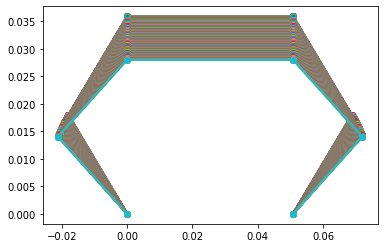

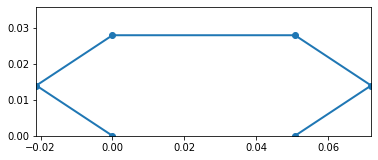

In [ ]:
states = clam([.2723])

points = [pNA, pAB, pBC, pED, pFE, pNF]
clam_points = PointsOutput(points,system)
y=clam_points.calc(states)
plt.figure()
for item in y:
    plt.plot(*(item.T),lw=2,marker='o')
#
po.animate(fps = 30, movie_name='glider.mp4',lw=2,marker='o')

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML
HTML(po.anim.to_html5_video())

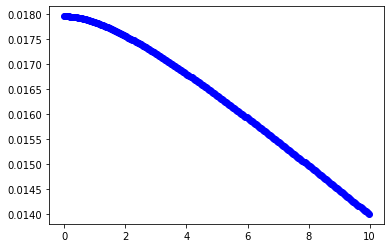

In [ ]:
'''This graph represents the time vs distance, pertaining to the point pAB.
This point is of interest because its the point of contact betweent the robot and the 
environment. From this graph we obtain information to calculate the velocity of the robot.
'''
y1 = y[:,:,-1]
plt.plot(t,y1[:,1],'bo')

In [ ]:
velocity = (0.0180-0.0140)/10
print('Velocity of the robot is-',velocity,'m/s')

Velocity of the robot is- 0.00039999999999999986 m/s
